In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression
import warnings

#  отключили ошибки
warnings.filterwarnings('ignore')
#  она вставляет в оутпут результат отрисовки
%matplotlib inline

db_coffe = pd.read_csv('coffee_ratings.csv', parse_dates=['expiration'])
db_coffe.head(3)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,2016-04-03,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,2016-04-03,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,2011-05-31,Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0


In [2]:
db_coffe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_cup_points       1339 non-null   float64       
 1   species                1339 non-null   object        
 2   owner                  1332 non-null   object        
 3   country_of_origin      1338 non-null   object        
 4   farm_name              980 non-null    object        
 5   lot_number             276 non-null    object        
 6   mill                   1021 non-null   object        
 7   ico_number             1182 non-null   object        
 8   company                1130 non-null   object        
 9   altitude               1113 non-null   object        
 10  region                 1280 non-null   object        
 11  producer               1107 non-null   object        
 12  number_of_bags         1339 non-null   int64         
 13  bag

In [3]:
def weight(waight_bag):
    """
    calculate weight of Bag tested and
    change type from string to float
    """
    waight_bag_list = waight_bag.split(' ')
    if len(waight_bag_list) > 1:
         if (waight_bag_list[1].find('kg') !=-1):
               return float(waight_bag_list[0])*2.20462
         else:
               return float(waight_bag_list[0])
    else:
          return float(waight_bag)
    
db_coffe.bag_weight = db_coffe.bag_weight.apply(weight)

db_coffe.isna().sum()

total_cup_points            0
species                     0
owner                       7
country_of_origin           1
farm_name                 359
lot_number               1063
mill                      318
ico_number                157
company                   209
altitude                  226
region                     59
producer                  232
number_of_bags              0
bag_weight                  0
in_country_partner          0
harvest_year               47
grading_date                0
owner_1                     7
variety                   226
processing_method         170
aroma                       0
flavor                      0
aftertaste                  0
acidity                     0
body                        0
balance                     0
uniformity                  0
clean_cup                   0
sweetness                   0
cupper_points               0
moisture                    0
category_one_defects        0
quakers                     1
color     

In [4]:
def new_altitude(height_altitude):
    """
    find altitude from messy column
    
    """
    num =''
    flag = False
    if type(height_altitude) != float:
        for char in height_altitude:
            if char.isdigit():
                num = num + char
                flag = True
            else:
                if flag:
                    break
        if num == '':
            return np.nan
        else:
            return num
    else:
        return height_altitude

db_coffe.altitude = db_coffe.altitude.apply(new_altitude).astype(float)
db_coffe.isna().sum()

total_cup_points            0
species                     0
owner                       7
country_of_origin           1
farm_name                 359
lot_number               1063
mill                      318
ico_number                157
company                   209
altitude                  229
region                     59
producer                  232
number_of_bags              0
bag_weight                  0
in_country_partner          0
harvest_year               47
grading_date                0
owner_1                     7
variety                   226
processing_method         170
aroma                       0
flavor                      0
aftertaste                  0
acidity                     0
body                        0
balance                     0
uniformity                  0
clean_cup                   0
sweetness                   0
cupper_points               0
moisture                    0
category_one_defects        0
quakers                     1
color     

In [5]:
def new_date(date_grad):
    """
    change format of date
    
    """
    date_list = date_grad.split(' ')
    day = ''
    for char in date_list[1]:
        if char.isdigit():
            day = day + char
        else:
            break
    date_grad = day+' '+date_list[0]+' '+ date_list[2]
    return date_grad

db_coffe.grading_date = db_coffe.grading_date.apply(new_date)
db_coffe.grading_date = db_coffe.grading_date.str.replace('\n','')
db_coffe['grading_date'] = pd.to_datetime(db_coffe['grading_date'], format='%d %B %Y')
db_coffe.isna().sum()
db_coffe.grading_date.dtype
# 'harvest_year'

dtype('<M8[ns]')

In [6]:
db_coffe.harvest_year.unique()

array(['2014', nan, '2013', '2012', 'March 2010',
       'Sept 2009 - April 2010', 'May-August', '2009/2010', '2015',
       '2011', '2016', '2015/2016', '2010', 'Fall 2009', '2017',
       '2009 / 2010', '2010-2011', '2009-2010', '2009 - 2010',
       '2013/2014', '2017 / 2018', 'mmm', 'TEST',
       'December 2009-March 2010', '2014/2015', '2011/2012',
       'January 2011', '4T/10', '2016 / 2017', '23 July 2010',
       'January Through April', '1T/2011', '4t/2010', '4T/2010',
       'August to December', 'Mayo a Julio', '47/2010', 'Abril - Julio',
       '4t/2011', 'Abril - Julio /2011', 'Spring 2011 in Colombia.',
       '3T/2011', '2016/2017', '1t/2011', '2018', '4T72010', '08/09 crop'],
      dtype=object)

In [7]:
def new_year(year_harvest):
    """
    Change format from string to datatime
    """
    n = ''
    flag = False
    if type(year_harvest) != float:
        for char in year_harvest:
            if char.isdigit():
                n = n + char
                flag = True
            else:
                if flag:
                    if len(n) >= 4:
                        break
                    else:
                        n = ''
        if n == '':
            return np.nan
        elif len(n) == 2:
            return '20'+n
        elif len(n) > 4:
            return n[1:5]
        else:           
            return n
    else:
        return np.nan
        
db_coffe.harvest_year = db_coffe.harvest_year.apply(new_year)
db_coffe.harvest_year =  pd.to_datetime(db_coffe.harvest_year, format='%Y')
db_coffe.harvest_year.dtype

dtype('<M8[ns]')

In [8]:
db_coffe.color.unique()

array(['Green', nan, 'Bluish-Green', 'None', 'Blue-Green'], dtype=object)

In [9]:
def new_color(x):
    """
    Dell None and change it to np.NaN
    
    """
    if x == 'None':
        return np.nan
    else: 
        return x 
    
db_coffe.color = db_coffe.color.apply(new_color)
db_coffe.color.unique()

array(['Green', nan, 'Bluish-Green', 'Blue-Green'], dtype=object)

In [10]:
for col in db_coffe.columns:
    print(f'{col} : {(db_coffe[col].isna().sum() / db_coffe.shape[0]) * 100: .2f}%')

total_cup_points :  0.00%
species :  0.00%
owner :  0.52%
country_of_origin :  0.07%
farm_name :  26.81%
lot_number :  79.39%
mill :  23.75%
ico_number :  11.73%
company :  15.61%
altitude :  17.10%
region :  4.41%
producer :  17.33%
number_of_bags :  0.00%
bag_weight :  0.00%
in_country_partner :  0.00%
harvest_year :  4.41%
grading_date :  0.00%
owner_1 :  0.52%
variety :  16.88%
processing_method :  12.70%
aroma :  0.00%
flavor :  0.00%
aftertaste :  0.00%
acidity :  0.00%
body :  0.00%
balance :  0.00%
uniformity :  0.00%
clean_cup :  0.00%
sweetness :  0.00%
cupper_points :  0.00%
moisture :  0.00%
category_one_defects :  0.00%
quakers :  0.07%
color :  20.16%
category_two_defects :  0.00%
expiration :  0.00%
certification_body :  0.00%
certification_address :  0.00%
certification_contact :  0.00%
unit_of_measurement :  0.00%
altitude_low_meters :  17.18%
altitude_high_meters :  17.18%
altitude_mean_meters :  17.18%


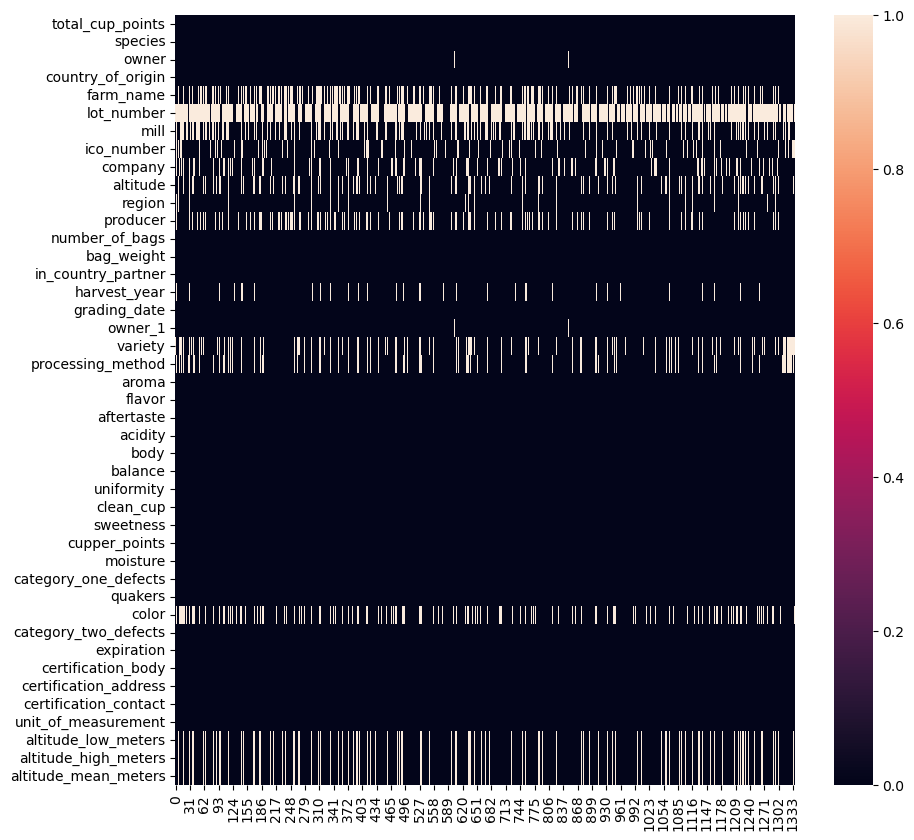

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(db_coffe.isna().transpose());

In [12]:
#  так как их очень малый процент, и нет возможности их заподнить удаляем
db_coffe.dropna(subset=['owner', 'country_of_origin', 'owner_1', 'quakers'], inplace=True)
db_coffe.isna().sum()

total_cup_points            0
species                     0
owner                       0
country_of_origin           0
farm_name                 357
lot_number               1054
mill                      317
ico_number                157
company                   208
altitude                  228
region                     58
producer                  230
number_of_bags              0
bag_weight                  0
in_country_partner          0
harvest_year               58
grading_date                0
owner_1                     0
variety                   225
processing_method         169
aroma                       0
flavor                      0
aftertaste                  0
acidity                     0
body                        0
balance                     0
uniformity                  0
clean_cup                   0
sweetness                   0
cupper_points               0
moisture                    0
category_one_defects        0
quakers                     0
color     

In [13]:
#  столбцы lot_number, 'mill' 
db_coffe.drop(['lot_number', 'mill', 
               'ico_number', 'company', 
               'altitude_low_meters',
               'altitude_high_meters',
               'altitude_mean_meters'], axis=1, inplace=True)
db_coffe.isna().sum()


total_cup_points           0
species                    0
owner                      0
country_of_origin          0
farm_name                357
altitude                 228
region                    58
producer                 230
number_of_bags             0
bag_weight                 0
in_country_partner         0
harvest_year              58
grading_date               0
owner_1                    0
variety                  225
processing_method        169
aroma                      0
flavor                     0
aftertaste                 0
acidity                    0
body                       0
balance                    0
uniformity                 0
clean_cup                  0
sweetness                  0
cupper_points              0
moisture                   0
category_one_defects       0
quakers                    0
color                    269
category_two_defects       0
expiration                 0
certification_body         0
certification_address      0
certification_

In [14]:

db_coffe.loc[:,'grading_date_year'] = db_coffe.grading_date.dt.year
db_coffe.grading_date_year = pd.to_datetime(db_coffe.grading_date_year, format='%Y')
db_coffe.grading_date_year.dtype
db_coffe.harvest_year = db_coffe.harvest_year.fillna(db_coffe.grading_date_year)
db_coffe.drop('grading_date_year', axis=1)
db_coffe.harvest_year.dtype

dtype('<M8[ns]')

In [15]:
def moda_x(x):
    try:
        if len(x[0]) == 1:
            return x
        else: 
            return x[0]
    except:
        return np.nan
    

In [16]:
def dell_nan_object(frame, list_of_column, name_of_column, func, flag=True):
    """
    dell NaN in column - name_of_column, for grouping data and use function - func
	
	  Args:
      frame:          frathe frame in which we will workme 
      name_of_column: the name of the column to be used for calculations
      list_for_group: list of columns to be grouped by
      func:           fucntion that use for fillna 
      flag:           flag show to us what type of data need to fill 
    """
    mean_group = frame.groupby(list_of_column, 
                                as_index=False).agg(new_column= (name_of_column,func))
    if flag:    
      mean_group.loc[:,'column_moda'] = mean_group['new_column'].apply(moda_x)
    else: 
      mean_group.loc[:,'column_moda'] = mean_group['new_column']
    frame = frame.merge(mean_group, how ='inner' ,
                            left_on=list_of_column, 
                            right_on=list_of_column
                              )
    frame.dropna(subset='column_moda', inplace=True)
    frame[name_of_column] = frame[name_of_column].\
                                       fillna(frame['column_moda'])
    frame.drop(['column_moda','new_column'], axis=1, inplace=True)

    return frame

In [17]:
db_coffe = dell_nan_object(db_coffe, ['species','country_of_origin'], 'region', pd.Series.mode, True)
db_coffe.isna().sum()

total_cup_points           0
species                    0
owner                      0
country_of_origin          0
farm_name                356
altitude                 227
region                     0
producer                 229
number_of_bags             0
bag_weight                 0
in_country_partner         0
harvest_year               0
grading_date               0
owner_1                    0
variety                  224
processing_method        169
aroma                      0
flavor                     0
aftertaste                 0
acidity                    0
body                       0
balance                    0
uniformity                 0
clean_cup                  0
sweetness                  0
cupper_points              0
moisture                   0
category_one_defects       0
quakers                    0
color                    268
category_two_defects       0
expiration                 0
certification_body         0
certification_address      0
certification_

In [18]:
db_coffe = dell_nan_object(db_coffe, ['species','country_of_origin'], 'color', pd.Series.mode, True)
db_coffe.color.unique()

array(['Green', 'Bluish-Green', 'Blue-Green'], dtype=object)

In [19]:
db_coffe = dell_nan_object(db_coffe, ['species','country_of_origin'], 'variety', pd.Series.mode, True)
db_coffe.isna().sum()


total_cup_points           0
species                    0
owner                      0
country_of_origin          0
farm_name                354
altitude                 225
region                     0
producer                 227
number_of_bags             0
bag_weight                 0
in_country_partner         0
harvest_year               0
grading_date               0
owner_1                    0
variety                    0
processing_method        156
aroma                      0
flavor                     0
aftertaste                 0
acidity                    0
body                       0
balance                    0
uniformity                 0
clean_cup                  0
sweetness                  0
cupper_points              0
moisture                   0
category_one_defects       0
quakers                    0
color                      0
category_two_defects       0
expiration                 0
certification_body         0
certification_address      0
certification_

In [20]:
db_coffe = dell_nan_object(db_coffe, ['species','country_of_origin'], 'processing_method', pd.Series.mode, True)
db_coffe.isna().sum()


total_cup_points           0
species                    0
owner                      0
country_of_origin          0
farm_name                354
altitude                 225
region                     0
producer                 227
number_of_bags             0
bag_weight                 0
in_country_partner         0
harvest_year               0
grading_date               0
owner_1                    0
variety                    0
processing_method          0
aroma                      0
flavor                     0
aftertaste                 0
acidity                    0
body                       0
balance                    0
uniformity                 0
clean_cup                  0
sweetness                  0
cupper_points              0
moisture                   0
category_one_defects       0
quakers                    0
color                      0
category_two_defects       0
expiration                 0
certification_body         0
certification_address      0
certification_

In [21]:
db_coffe = dell_nan_object(db_coffe, ['species','owner'], 'producer', pd.Series.mode, True)
db_coffe.isna().sum()

total_cup_points           0
species                    0
owner                      0
country_of_origin          0
farm_name                293
altitude                 190
region                     0
producer                   0
number_of_bags             0
bag_weight                 0
in_country_partner         0
harvest_year               0
grading_date               0
owner_1                    0
variety                    0
processing_method          0
aroma                      0
flavor                     0
aftertaste                 0
acidity                    0
body                       0
balance                    0
uniformity                 0
clean_cup                  0
sweetness                  0
cupper_points              0
moisture                   0
category_one_defects       0
quakers                    0
color                      0
category_two_defects       0
expiration                 0
certification_body         0
certification_address      0
certification_

In [22]:
db_coffe = dell_nan_object(db_coffe, ['owner','country_of_origin'], 'farm_name', pd.Series.mode, True)
db_coffe.isna().sum()

total_cup_points           0
species                    0
owner                      0
country_of_origin          0
farm_name                  0
altitude                 140
region                     0
producer                   0
number_of_bags             0
bag_weight                 0
in_country_partner         0
harvest_year               0
grading_date               0
owner_1                    0
variety                    0
processing_method          0
aroma                      0
flavor                     0
aftertaste                 0
acidity                    0
body                       0
balance                    0
uniformity                 0
clean_cup                  0
sweetness                  0
cupper_points              0
moisture                   0
category_one_defects       0
quakers                    0
color                      0
category_two_defects       0
expiration                 0
certification_body         0
certification_address      0
certification_

In [23]:
db_coffe = dell_nan_object(db_coffe, ['species','country_of_origin'], 'altitude', 'median', False)
db_coffe.isna().sum()

total_cup_points         0
species                  0
owner                    0
country_of_origin        0
farm_name                0
altitude                 0
region                   0
producer                 0
number_of_bags           0
bag_weight               0
in_country_partner       0
harvest_year             0
grading_date             0
owner_1                  0
variety                  0
processing_method        0
aroma                    0
flavor                   0
aftertaste               0
acidity                  0
body                     0
balance                  0
uniformity               0
clean_cup                0
sweetness                0
cupper_points            0
moisture                 0
category_one_defects     0
quakers                  0
color                    0
category_two_defects     0
expiration               0
certification_body       0
certification_address    0
certification_contact    0
unit_of_measurement      0
grading_date_year        0
d

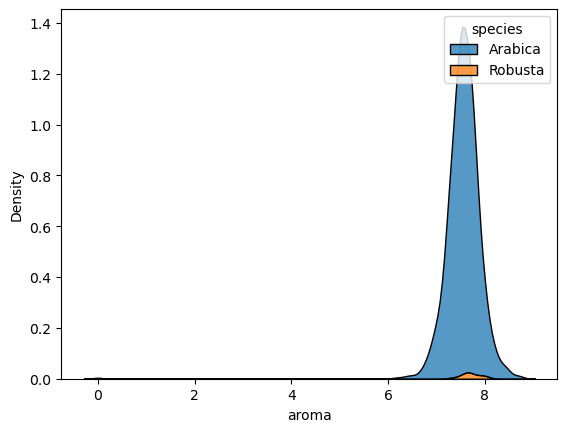

In [24]:
sns.kdeplot(data=db_coffe, x='aroma', hue="species", multiple="stack")
plt.show()

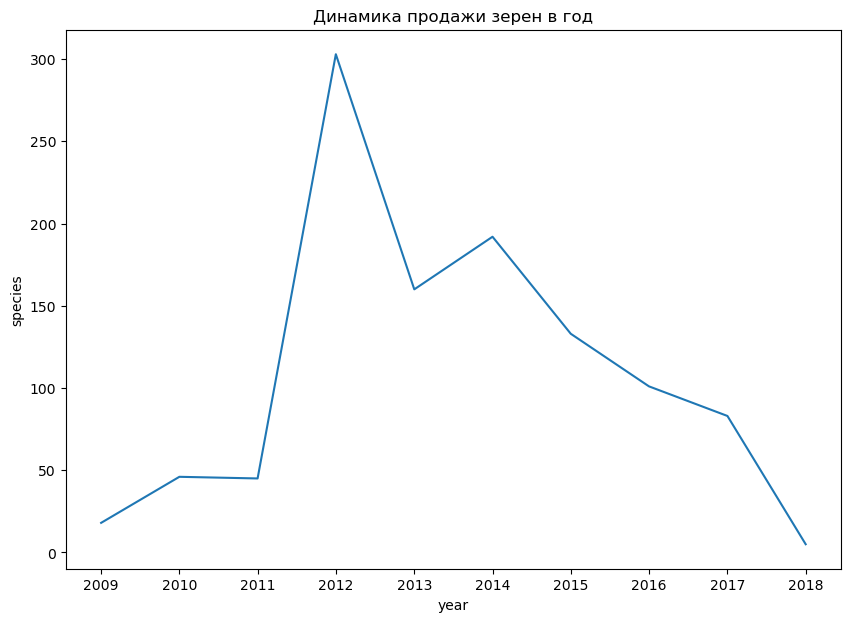

In [25]:
data = db_coffe.groupby(['harvest_year'], as_index=False).agg(count_in_year= ('species','count'))
plt.figure(figsize=(10,7))
plt.plot(data['harvest_year'], data.count_in_year)
plt.title('Динамика продажи зерен в год')
plt.xlabel('year')
plt.ylabel('species')
plt.show()


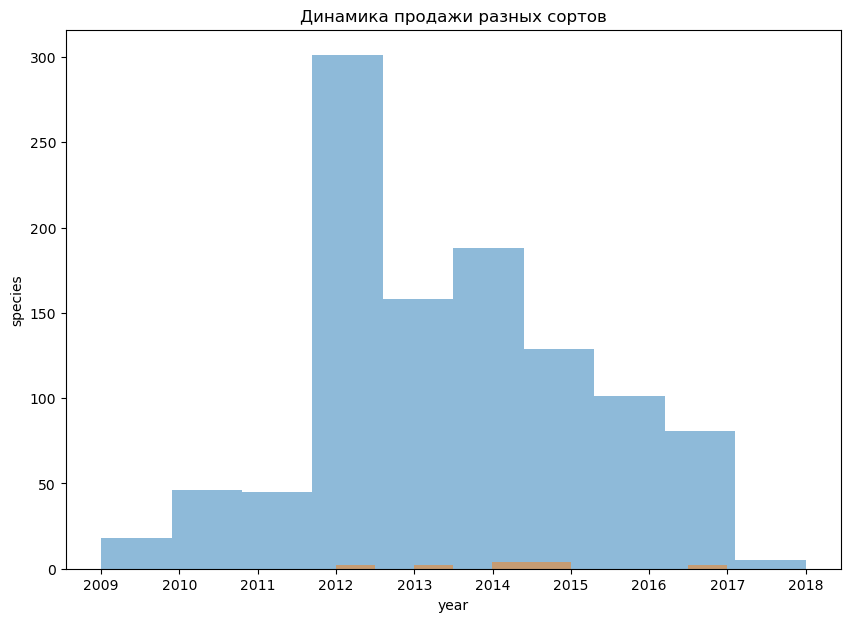

In [26]:

plt.figure(figsize=(10,7))
plt.hist(db_coffe['harvest_year'][db_coffe.species =='Arabica'], alpha=0.5, label = 'Arabica')
plt.hist(db_coffe['harvest_year'][db_coffe.species =='Robusta'], alpha=0.5, label = 'Robusta')
plt.title('Динамика продажи разных сортов')
plt.xlabel('year')
plt.ylabel('species')
plt.show()

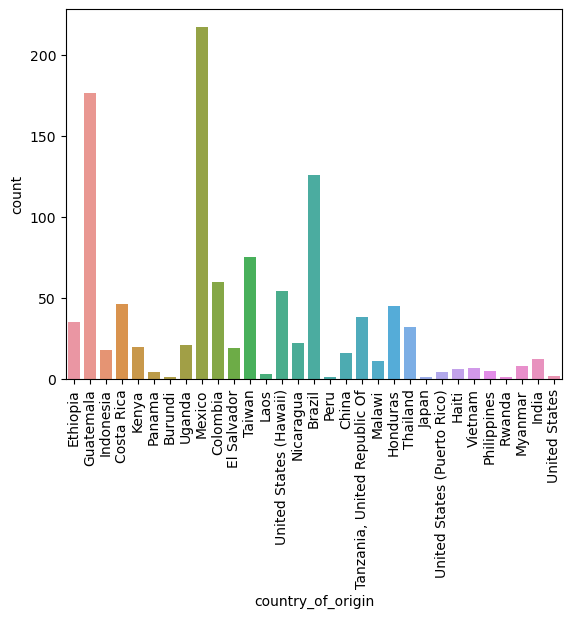

In [27]:
# 2 Какие страны являются крупными экспортерами кофе?

sns.countplot(x='country_of_origin', data = db_coffe).set_xticklabels(db_coffe.country_of_origin.unique(), rotation = 90)
plt.show()



Мексика, Гватемала и Бразилия, являются основными экспортерами кофе

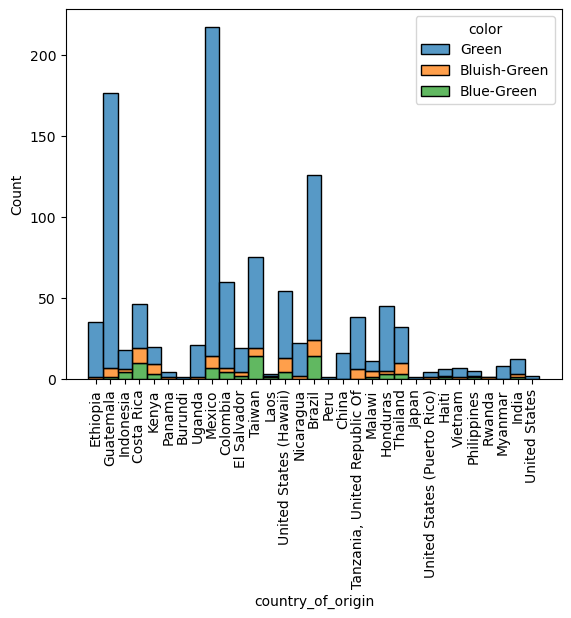

In [28]:
sns.histplot(data=db_coffe, x='country_of_origin', hue="color", multiple="stack").\
    set_xticklabels(db_coffe.country_of_origin.unique(), rotation = 90)
plt.show()

по данной гистограмме видно что в основном идет экспорт зерен зеленого цвета

In [29]:
# 3. Каковы корреляции между различными показателями оценки кофе?

db_corr = db_coffe[['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance',
          'uniformity', 'clean_cup', 'sweetness','moisture', 'altitude']].corr(method = 'pearson')
db_corr

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,moisture,altitude
aroma,1.000000,0.840208,0.801926,0.762899,0.735389,0.763415,0.428895,0.358976,0.328195,-0.095676,-0.006992
flavor,0.840208,1.000000,0.900513,0.833163,0.789407,0.822222,0.461640,0.413214,0.347370,-0.132742,-0.005890
aftertaste,0.801926,0.900513,1.000000,0.807413,0.789108,0.842614,0.457939,0.407090,0.328266,-0.171069,-0.033198
acidity,0.762899,0.833163,0.807413,1.000000,0.778801,0.782209,0.439066,0.323666,0.319011,-0.121627,0.021725
body,0.735389,0.789407,0.789108,0.778801,1.000000,0.807194,0.413178,0.310844,0.315282,-0.169488,-0.004442
balance,0.763415,0.822222,0.842614,0.782209,0.807194,1.000000,0.462771,0.392394,0.338189,-0.191104,-0.006891
uniformity,0.428895,0.461640,0.457939,0.439066,0.413178,0.462771,1.000000,0.512834,0.495536,0.005787,0.007610
clean_cup,0.358976,0.413214,0.407090,0.323666,0.310844,0.392394,0.512834,1.000000,0.478636,-0.013965,0.012276
sweetness,0.328195,0.347370,0.328266,0.319011,0.315282,0.338189,0.495536,0.478636,1.000000,0.086933,-0.000438
moisture,-0.095676,-0.132742,-0.171069,-0.121627,-0.169488,-0.191104,0.005787,-0.013965,0.086933,1.000000,0.023172


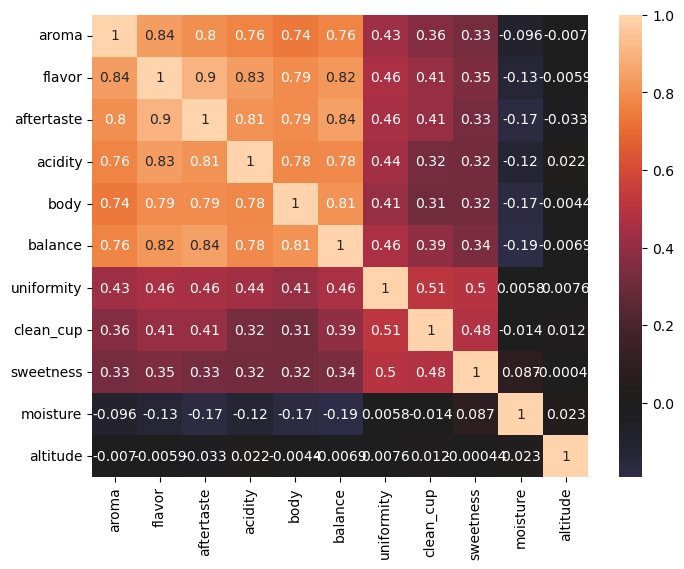

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(db_corr, xticklabels=db_corr.columns, yticklabels=db_corr.columns, center=0, annot=True)
plt.show()

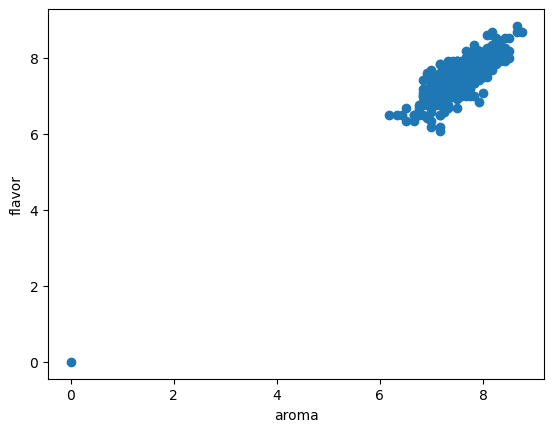

In [395]:
plt.scatter(db_coffe['aroma'], db_coffe['flavor'])
plt.xlabel('aroma')
plt.ylabel('flavor')
plt.show()

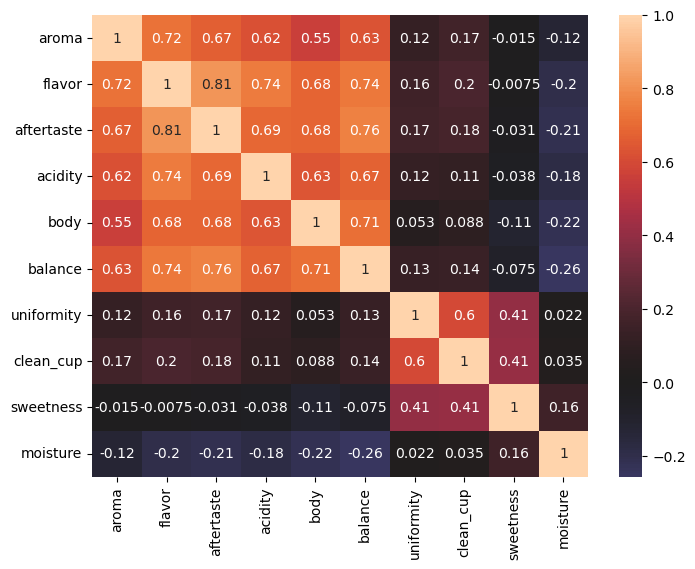

In [31]:
db_corr = db_coffe[['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance',
          'uniformity', 'clean_cup', 'sweetness','moisture']].corr(method = 'spearman')
plt.figure(figsize=(8,6))
sns.heatmap(db_corr, xticklabels=db_corr.columns, yticklabels=db_corr.columns, center=0, annot=True)
plt.show()

In [32]:
db_coffe['country_of_origin_rank'] = db_coffe['country_of_origin'].rank(ascending=False)
db_coffe['variety_rank'] = db_coffe['variety'].rank(ascending=False)
db_coffe.head(3)

,total_cup_points,species,owner,country_of_origin,farm_name,altitude,region,producer,number_of_bags,bag_weight,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,grading_date_year,country_of_origin_rank,variety_rank
0,90.58,Arabica,metad plc,Ethiopia,metad plc,1950.0,guji-hambela,METAD PLC,300,132.2772,...,Green,0,2016-04-03,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,2015-01-01,801.0,371.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,1950.0,guji-hambela,METAD PLC,300,132.2772,...,Green,1,2016-04-03,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,2015-01-01,801.0,371.0
2,88.83,Arabica,metad plc,Ethiopia,metad plc,1950.0,guji-hambela,METAD PLC,300,132.2772,...,Green,2,2016-04-03,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,2015-01-01,801.0,371.0


In [33]:
db_coffe[['aroma','variety_rank']].corr(method = 'spearman')

,aroma,variety_rank
aroma,1.000000,0.054818
variety_rank,0.054818,1.000000


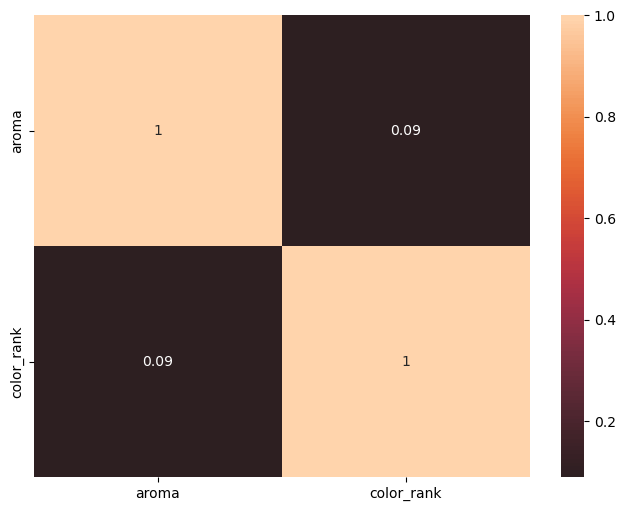

In [34]:
# 4. Как (если есть) влияние цвета зерен на общий сорт кофе?

db_coffe['color_rank'] = db_coffe['color'].rank(ascending=False)
db_coffe.head(3)
db_corr = db_coffe[['aroma','color_rank']].corr(method = 'spearman')

plt.figure(figsize=(8,6))
sns.heatmap(db_corr, xticklabels=db_corr.columns, yticklabels=db_corr.columns, center=0, annot=True)
plt.show()

Линейной зависимости между цветом и сортом не наблюдается


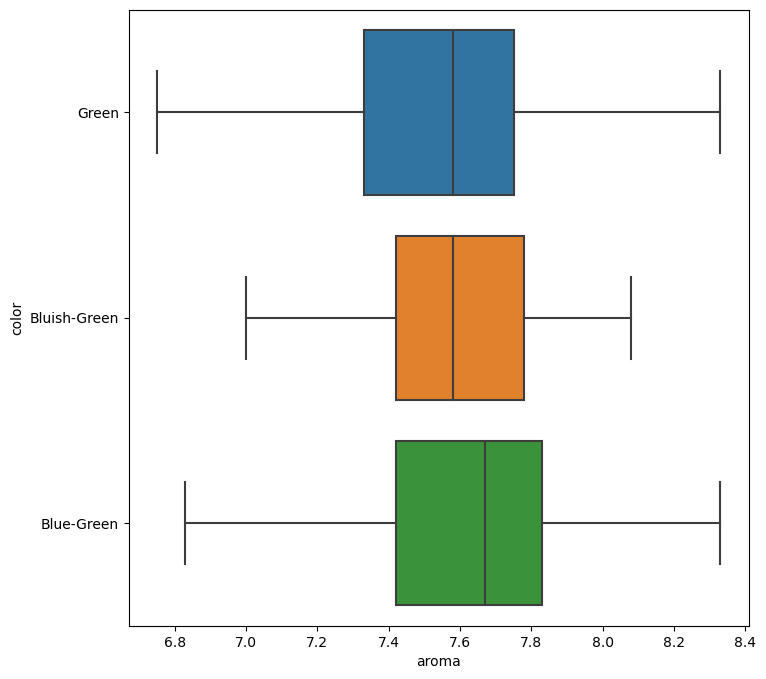

In [35]:
plt.subplots(figsize=(8,8))
sns.boxplot(data=db_coffe, x='aroma', y='color', showfliers = False)
plt.show()

по данным boxplot видно что вне зависимости от цвета показатели качества отличаются не значительно, для двух цветом показатели медианы и 75% парсиля идентичны

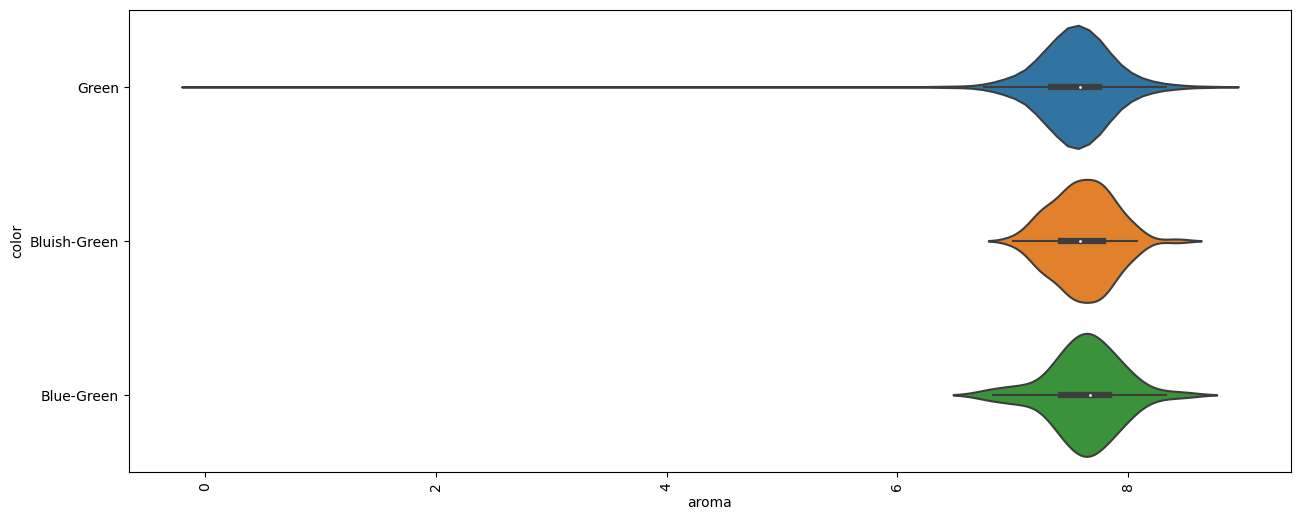

In [36]:
plt.subplots(figsize=(15,6))
sns.violinplot(data=db_coffe, x='aroma', y='color')
plt.xticks(rotation=90)
plt.show()

зерна различного цвета распределены анагогичным образом

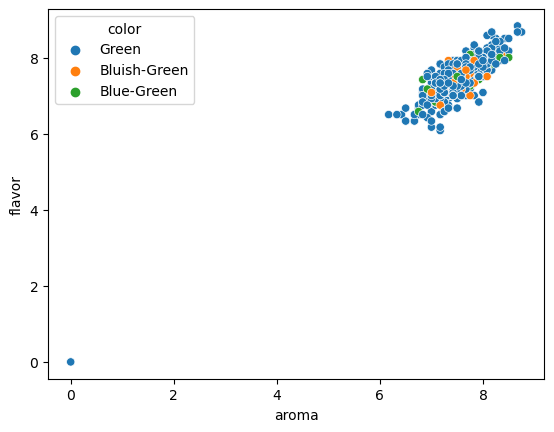

In [37]:
sns.scatterplot(x = 'aroma', y ='flavor', hue='color', data=db_coffe)
plt.show()

в целом большого влияния цвета не обнаружено

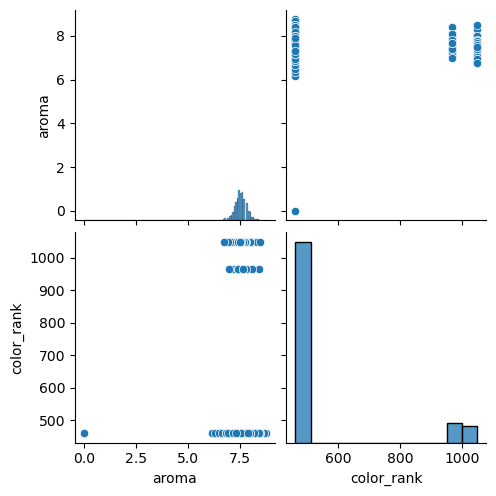

corr:  0.08957567436131265
p:  0.003132124731706635


In [39]:
import scipy.stats as sps

sns.pairplot(db_coffe[['aroma', 'color_rank']])
plt.show()


(corr, p) = sps.spearmanr(db_coffe.aroma, db_coffe.color_rank, alternative='two-sided')
print('corr: ', corr)
print('p: ', p)

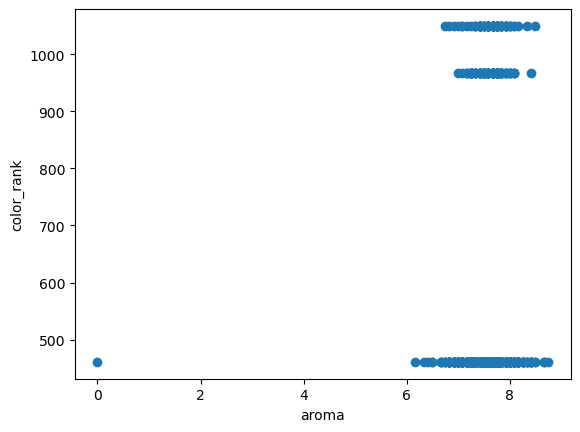

In [40]:
plt.scatter(db_coffe['aroma'] ,db_coffe['color_rank'])
plt.xlabel('aroma')
plt.ylabel('color_rank')
plt.show()

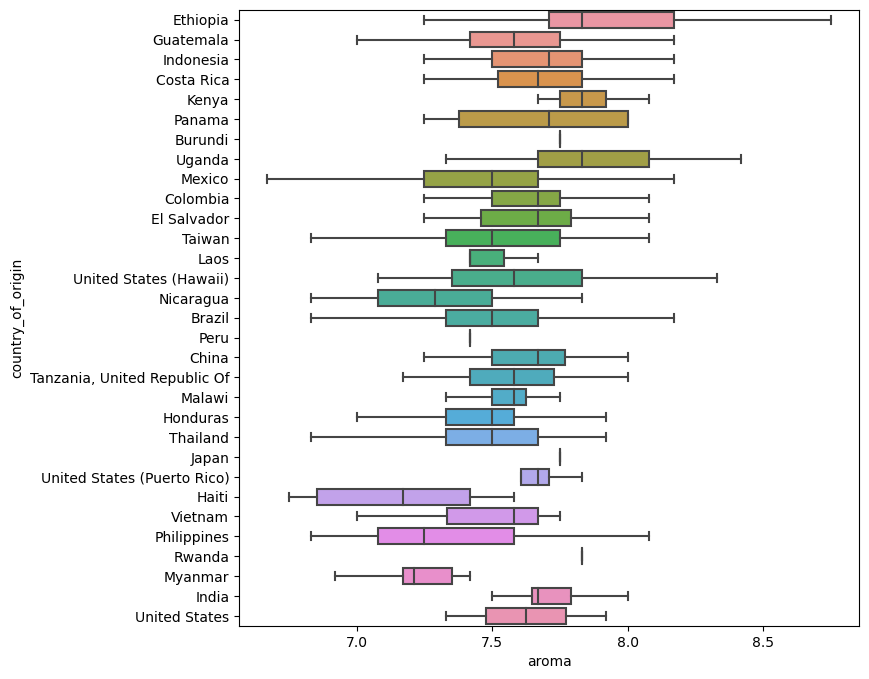

In [41]:
# 5. Влияет ли страна происхождения на качество кофе?

plt.subplots(figsize=(8,8))
sns.boxplot(data=db_coffe, x='aroma', y='country_of_origin', showfliers = False)
plt.show()

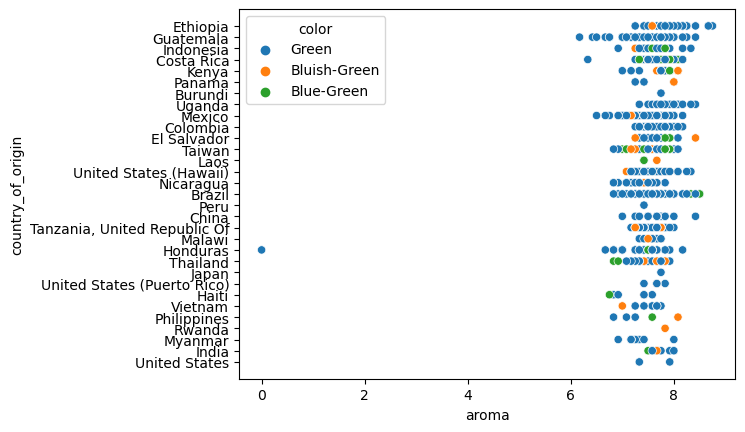

In [42]:
sns.scatterplot(x = 'aroma', y ='country_of_origin', hue='color', data=db_coffe)
plt.show()

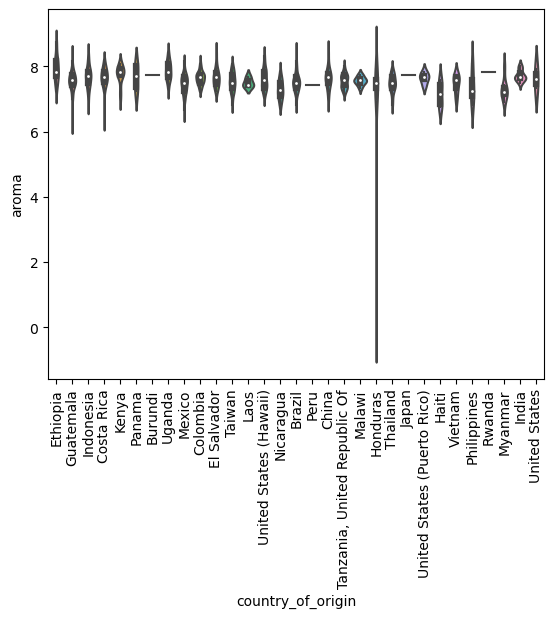

In [43]:
sns.violinplot(data=db_coffe, y='aroma', x='country_of_origin')
plt.xticks(rotation=90)
plt.show()

у одной страны есть непонятный выброс, но в целом зерна из разных стран, дают небольшой разбег по качеству, но есть страны в которых наблюдается более низкое или более высокое качество

по boxplot видим что различия есть более значительные как в показатели средних так и в парсилях, и мин, макс

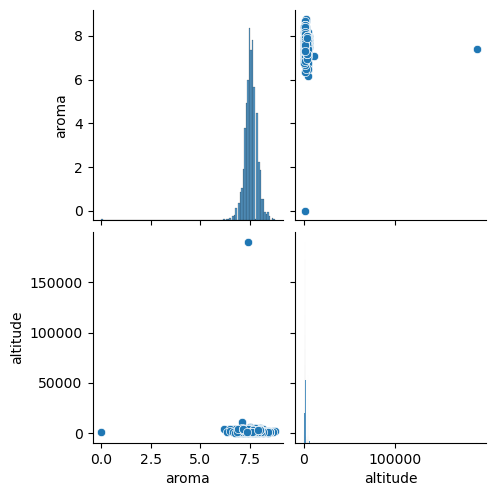

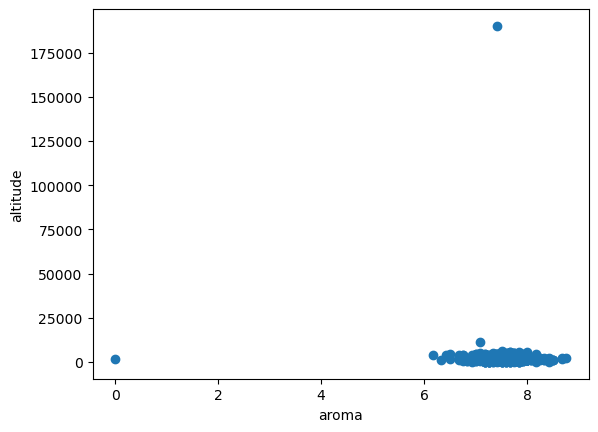

In [44]:
# 6. Существенно ли влияет высота на качество кофе?

sns.pairplot(db_coffe[['aroma', 'altitude']])
plt.show()

plt.scatter(db_coffe['aroma'], db_coffe['altitude'])
plt.xlabel('aroma')
plt.ylabel('altitude')
plt.show()

нет особого влияния качетсва кофе на высоту. 